## Hypothesis1 - PM2.5 represents the ambient air quality.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import aqi

In [2]:

myaqi = aqi.to_aqi([
    (aqi.POLLUTANT_PM25, '35.9')
])
print(myaqi)

102


In [6]:
# Read feather file
df = pd.read_feather('Archives/export_UIUC_feather', columns=None, use_threads=True)
df=df.drop(['index'], axis=1)
df

FileNotFoundError: [Errno 2] Failed to open local file 'Archives/export_UIUC_feather'. Detail: [errno 2] No such file or directory

In [48]:
df['reading_datestamp'] = pd.to_datetime(df['reading_datestamp'])
# set a column as the index
df.set_index('reading_datestamp', inplace=True)
df.head()

,co_prescaled,CO2_prescaled,no_prescaled,no2_prescaled,o3_prescaled,pm1_prescale,pm2_5_prescale,pm4_prescale,pm10_prescale,pm_total_prescale,pm_tpc_prescale,nox_prescaled,temperature_f,pressure,humidity
reading_datestamp,,,,,,,,,,,,,,,
2021-09-02 04:45:00,250.38,420.35,15.87,6.86,14.86,5.38,6.94,8.00,10.23,10.23,2.91,13.14,75.9,992.6,63.6
2021-09-02 05:00:00,255.19,418.04,15.78,7.10,16.61,5.26,6.89,7.97,9.76,9.76,2.82,12.58,77.0,992.5,62.5
2021-09-02 05:15:00,254.69,413.88,15.90,7.30,18.42,5.35,6.98,8.12,11.68,11.70,2.88,14.58,77.7,993.0,61.5
2021-09-02 05:30:00,265.17,412.49,15.54,7.48,20.59,5.20,6.77,7.84,9.82,9.82,2.78,12.60,78.4,992.3,61.0
2021-09-02 05:45:00,256.95,408.79,17.10,6.56,23.36,5.40,6.97,8.12,10.32,10.32,2.92,13.24,79.2,992.9,59.8


(18872.0, 18959.0)

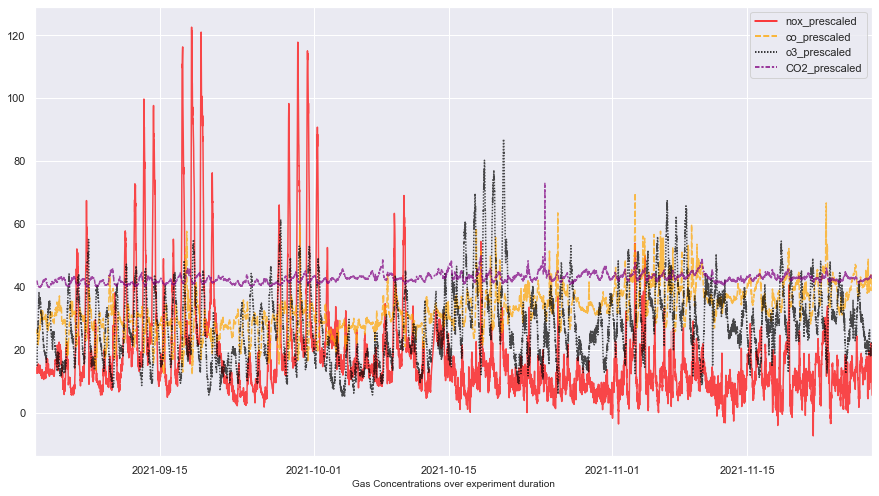

In [59]:
df_scale=df.copy()
df_scale['co_prescaled']=df_scale['co_prescaled']/10
df_scale['CO2_prescaled']=df_scale['CO2_prescaled']/10
sns.set_context("notebook", font_scale=1)
sns.set(rc={'figure.figsize':(15,8.27)})
left = dt(2021,9,2)
right = dt(2021,11,28)
ax = sns.lineplot(data=df_scale[['nox_prescaled', 'co_prescaled', 'o3_prescaled','CO2_prescaled']], palette = ['red', 'orange','black','purple'], alpha=0.7)
ax.set_xlabel('Gas Concentrations over experiment duration', fontsize=10)
ax.set_xlim(left, right)

In [66]:
# Now we will import the data acquired and cleaned from PurpleAir.com for 3 locations and merge with our dataset.

df_urbanaOH = pd.read_feather('export_UrbanaOnHolmes_feather', columns=None, use_threads=True)
df_urbanaOH['new_date'] = pd.to_datetime(df_urbanaOH['new_date'])
df_urbanaOH=df_urbanaOH[['new_date','PM2.5 (CF=1) ug/m3']]
df_urbanaOH = df_urbanaOH.rename({'new_date': 'reading_datestamp','PM2.5 (CF=1) ug/m3': 'pm2.5_UrbanaOH' }, axis=1)
df_urbanaOH.set_index('reading_datestamp', inplace=True)
#df_urbanaOH
df_urbanaOH = df_urbanaOH[df_urbanaOH.index.isin(df.index)]

df_urbana = pd.read_feather('export_Urbana_feather', columns=None, use_threads=True)
df_urbana['new_date'] = pd.to_datetime(df_urbana['new_date'])
df_urbana=df_urbana[['new_date','PM2.5 (CF=1) ug/m3']]
df_urbana = df_urbana.rename({'new_date': 'reading_datestamp','PM2.5 (CF=1) ug/m3': 'pm2.5_Urbana' }, axis=1)
df_urbana.set_index('reading_datestamp', inplace=True)
# df_urbana
df_urbana = df_urbana[df_urbana.index.isin(df.index)]

df_champaign = pd.read_feather('export_WarnowChacko_feather', columns=None, use_threads=True)
df_champaign['new_date'] = pd.to_datetime(df_champaign['new_date'])
df_champaign=df_champaign[['new_date','PM2.5 (CF=1) ug/m3']]
df_champaign = df_champaign.rename({'new_date': 'reading_datestamp','PM2.5 (CF=1) ug/m3': 'pm2.5_Champaign' }, axis=1)
df_champaign.set_index('reading_datestamp', inplace=True)
# df_champaign
df_champaign = df_champaign[df_champaign.index.isin(df.index)] 
#Since the location in Champaign has data missing for some days we will keep it seperate for now.

combined_urbana= pd.merge(df_urbanaOH,df_urbana, on='reading_datestamp')
merged= pd.merge(df,combined_urbana, on='reading_datestamp')
merged.info() # This is the data for UIUC + 2 purple air locations in Urbana
df_champaign.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8316 entries, 2021-09-02 04:45:00 to 2021-11-28 08:45:00
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   co_prescaled       8316 non-null   float64
 1   CO2_prescaled      8316 non-null   float64
 2   no_prescaled       8316 non-null   float64
 3   no2_prescaled      8316 non-null   float64
 4   o3_prescaled       8316 non-null   float64
 5   pm1_prescale       8290 non-null   float64
 6   pm2_5_prescale     8290 non-null   float64
 7   pm4_prescale       8290 non-null   float64
 8   pm10_prescale      8290 non-null   float64
 9   pm_total_prescale  8290 non-null   float64
 10  pm_tpc_prescale    8290 non-null   float64
 11  nox_prescaled      8316 non-null   float64
 12  temperature_f      8316 non-null   float64
 13  pressure           8316 non-null   float64
 14  humidity           8316 non-null   float64
 15  pm2.5_UrbanaOH     8316 non-null   f

# Converting concentrations to AIR Quality Index

To get AQI values from PM2.5 we will directly convert the PM2.5 concentrations to AQI using U.S EPA algorithm.

In [75]:
df_aqi = merged.copy()
from functions import val_to_aqi
df_aqi['AQI_UIUC_PM25']=val_to_aqi('POLLUTANT_PM25', df_aqi['pm2_5_prescale']) #based on pm2.5 vals from UIUC sensor
df_aqi['AQI_UrbanaOH']=val_to_aqi('POLLUTANT_PM25', df_aqi['pm2.5_UrbanaOH'])
df_aqi['AQI_Urbana']=val_to_aqi('POLLUTANT_PM25', df_aqi['pm2.5_Urbana'])
df_aqi_25= df_aqi[['AQI_UrbanaOH','AQI_Urbana','AQI_UIUC_PM25']].copy()
df_aqi_25

,AQI_UrbanaOH,AQI_Urbana,AQI_UIUC_PM25
reading_datestamp,,,
2021-09-02 04:45:00,35,31,29
2021-09-02 05:00:00,38,34,28
2021-09-02 05:15:00,38,35,29
2021-09-02 05:30:00,40,37,28
2021-09-02 05:45:00,38,38,29
...,...,...,...
2021-11-28 07:45:00,62,57,28
2021-11-28 08:00:00,62,58,27
2021-11-28 08:15:00,62,58,27


In [76]:
from functions import combined_aqi

df_aqi = merged[['co_prescaled','no2_prescaled','o3_prescaled','pm10_prescale','pm2_5_prescale']].copy()
df_aqi= df_aqi.dropna()
df_aqi.reset_index(level=0, inplace=True)
df_aqi['co_prescaled']= df_aqi['co_prescaled']/1000
df_aqi['o3_prescaled']=df_aqi['o3_prescaled']/1000

for i in df_aqi.index.values.tolist():
    df_aqi.loc[i,'combAQI'] = combined_aqi(df_aqi.iloc[i].tolist())
    
df_aqi.set_index('reading_datestamp', inplace=True)
df_aqi_uiuc=df_aqi[['combAQI']].copy()
df_aqi_uiuc

,combAQI
reading_datestamp,
2021-09-02 04:45:00,29.0
2021-09-02 05:00:00,28.0
2021-09-02 05:15:00,29.0
2021-09-02 05:30:00,28.0
2021-09-02 05:45:00,29.0
...,...
2021-11-28 07:45:00,28.0
2021-11-28 08:00:00,27.0
2021-11-28 08:15:00,27.0


In [77]:
AQI_combined= pd.merge(df_aqi_uiuc,df_aqi_25, on='reading_datestamp')
#AQI_combined.reset_index(level=0, inplace=True)
AQI_combined

,combAQI,AQI_UrbanaOH,AQI_Urbana,AQI_UIUC_PM25
reading_datestamp,,,,
2021-09-02 04:45:00,29.0,35,31,29
2021-09-02 05:00:00,28.0,38,34,28
2021-09-02 05:15:00,29.0,38,35,29
2021-09-02 05:30:00,28.0,40,37,28
2021-09-02 05:45:00,29.0,38,38,29
...,...,...,...,...
2021-11-28 07:45:00,28.0,62,57,28
2021-11-28 08:00:00,27.0,62,58,27
2021-11-28 08:15:00,27.0,62,58,27


In [78]:
# Now let us combine all 3 purple air AQI values with AQI from UIUC sensor PM2.5 only and PM + gases combined
df_champaign_AQI = pd.DataFrame()
df_champaign_AQI['reading_datestamp'] = df_champaign.index

df_champaign_AQI['AQI_Champaign']=val_to_aqi('POLLUTANT_PM25', df_champaign['pm2.5_Champaign'])

df_champaign_AQI=df_champaign_AQI.iloc[0:6062]
# df_champaign_AQI

AQI_combined_all= pd.merge(AQI_combined,df_champaign_AQI,  how='inner', on='reading_datestamp')
AQI_combined_all.set_index('reading_datestamp', inplace=True)
AQI_combined_all

,combAQI,AQI_UrbanaOH,AQI_Urbana,AQI_UIUC_PM25,AQI_Champaign
reading_datestamp,,,,,
2021-09-25 16:00:00,24.0,4,4,12,4
2021-09-25 16:15:00,23.0,3,4,12,5
2021-09-25 16:30:00,24.0,5,3,9,3
2021-09-25 16:45:00,22.0,3,3,9,3
2021-09-25 17:00:00,24.0,3,3,9,3
...,...,...,...,...,...
2021-11-28 07:45:00,28.0,62,57,28,42
2021-11-28 08:00:00,27.0,62,58,27,43
2021-11-28 08:15:00,27.0,62,58,27,45


(18895.0, 18959.0)

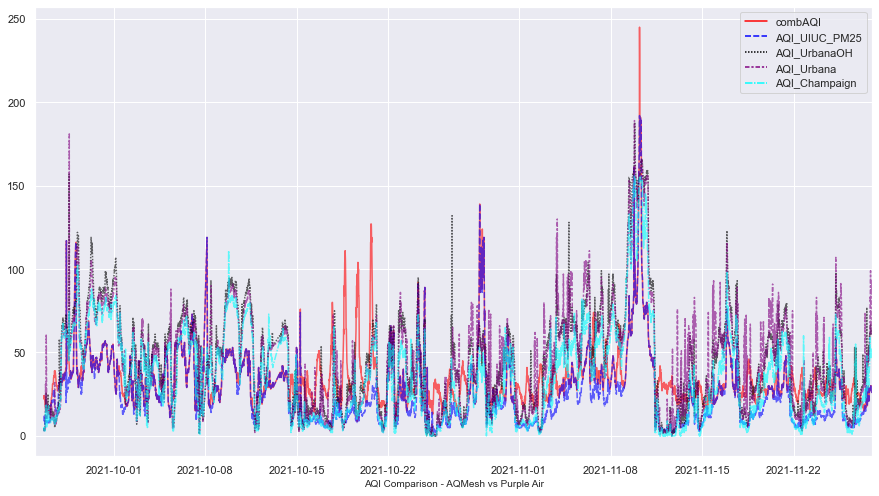

In [80]:
from datetime import datetime as dt
import seaborn as sns
sns.set_context("notebook", font_scale=1)
sns.set(rc={'figure.figsize':(15,8.27)})
left = dt(2021,9,25)
right = dt(2021,11,28)
ax = sns.lineplot(data=AQI_combined_all[['combAQI','AQI_UIUC_PM25', 'AQI_UrbanaOH','AQI_Urbana','AQI_Champaign']],
                  palette = ['red', 'blue','black','purple', 'cyan'], alpha=0.6)
#ax = sns.lineplot(data=df_champaign[['pm2.5_Champaign']], palette = ['brown'], alpha=0.6)
ax.set_xlabel('AQI Comparison - AQMesh vs Purple Air', fontsize=10)
ax.set_xlim(left, right)

## All values almost overlap eachother.

(18895.0, 18959.0)

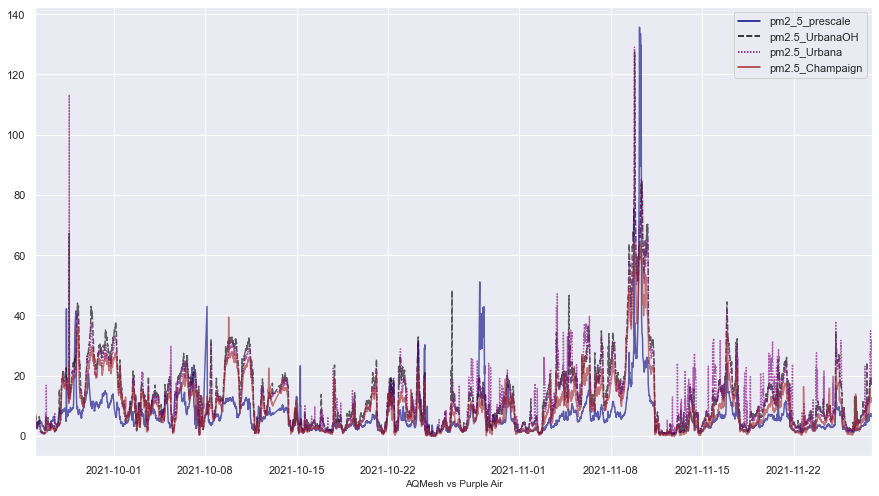

In [15]:
from datetime import datetime as dt
import seaborn as sns
sns.set_context("notebook", font_scale=1,rc={'figure.figsize':(18,6)})
left = dt(2021,9,25)
right = dt(2021,11,28)
ax = sns.lineplot(data=merged[['pm2_5_prescale', 'pm2.5_UrbanaOH','pm2.5_Urbana']], palette = ['navy', 'black','purple'], alpha=0.6)
ax = sns.lineplot(data=df_champaign[['pm2.5_Champaign']], palette = ['brown'], alpha=0.6)
ax.set_xlabel('AQMesh vs Purple Air', fontsize=10)
ax.set_xlim(left, right)



In [83]:
# Convert UIUC Sensor to AQI

df_aqi = merged[['co_prescaled','no2_prescaled','o3_prescaled','pm10_prescale','pm2_5_prescale']].copy()
df_aqi= df_aqi.dropna()
df_aqi.reset_index(level=0, inplace=True)
df_aqi['co_prescaled']= df_aqi['co_prescaled']/1000
df_aqi['o3_prescaled']=df_aqi['o3_prescaled']/1000

df_covertedAQI = pd.DataFrame()
df_covertedAQI['reading_datestamp']=df_aqi['reading_datestamp']
df_covertedAQI['AQI_CO']=val_to_aqi('POLLUTANT_CO_8H', df_aqi['co_prescaled'])
df_covertedAQI['AQI_NO2']=val_to_aqi('POLLUTANT_NO2_1H', df_aqi['no2_prescaled'])
df_covertedAQI['AQI_O3']=val_to_aqi('POLLUTANT_O3_8H', df_aqi['o3_prescaled'])
df_covertedAQI['AQI_PM10']=val_to_aqi('POLLUTANT_PM10', df_aqi['pm10_prescale'])
df_covertedAQI['AQI_PM25']=val_to_aqi('POLLUTANT_PM25', df_aqi['pm2_5_prescale'])
df_covertedAQI.set_index('reading_datestamp', inplace=True)
df_covertedAQI



,AQI_CO,AQI_NO2,AQI_O3,AQI_PM10,AQI_PM25
reading_datestamp,,,,,
2021-09-02 04:45:00,2,6,12,9,29
2021-09-02 05:00:00,2,7,14,8,28
2021-09-02 05:15:00,2,7,15,10,29
2021-09-02 05:30:00,2,7,17,8,28
2021-09-02 05:45:00,2,6,19,9,29
...,...,...,...,...,...
2021-11-28 07:45:00,5,18,12,13,28
2021-11-28 08:00:00,5,17,13,12,27
2021-11-28 08:15:00,5,16,13,13,27


In [84]:
from functions import get_label

AQI_combined['combAQI_c']= [get_label(val) for val in AQI_combined['combAQI']]
AQI_combined['AQI_UIUC_PM25_c']= [get_label(val) for val in AQI_combined['AQI_UIUC_PM25']]
AQI_combined['AQI_UrbanaOH_c']= [get_label(val) for val in AQI_combined['AQI_UrbanaOH']]
AQI_combined['AQI_Urbana_c']= [get_label(val) for val in AQI_combined['AQI_Urbana']]
AQI_combined

,combAQI,AQI_UrbanaOH,AQI_Urbana,AQI_UIUC_PM25,combAQI_c,AQI_UrbanaOH_c,AQI_Urbana_c,AQI_UIUC_PM25_c
reading_datestamp,,,,,,,,
2021-09-02 04:45:00,29.0,35,31,29,Good,Good,Good,Good
2021-09-02 05:00:00,28.0,38,34,28,Good,Good,Good,Good
2021-09-02 05:15:00,29.0,38,35,29,Good,Good,Good,Good
2021-09-02 05:30:00,28.0,40,37,28,Good,Good,Good,Good
2021-09-02 05:45:00,29.0,38,38,29,Good,Good,Good,Good
...,...,...,...,...,...,...,...,...
2021-11-28 07:45:00,28.0,62,57,28,Good,Moderate,Moderate,Good
2021-11-28 08:00:00,27.0,62,58,27,Good,Moderate,Moderate,Good
2021-11-28 08:15:00,27.0,62,58,27,Good,Moderate,Moderate,Good


In [103]:
colz= AQI_combined.columns[4:]
for col in colz:
    Comparison[col]=AQI_combined[col].value_counts().to_frame()
Comparison

,AQI_UIUC_PM25_c,combAQI_c,AQI_UrbanaOH_c,AQI_Urbana_c
Good,7594,7466,4873,4964
Moderate,651,760,3197,3134
Unhealthy for Sensitive Groups,32,51,112,105
Unhealthy,21,19,116,95


In [18]:
colors = ['purple',  'red', 'orange', 'yellow', 'green']
orders = ['Very Unhealthy', 'Unhealthy', 'Unhealthy for Sensitive Groups', 'Moderate', 'Good']
colormap = dict(zip(orders, colors))
colormap

{'Very Unhealthy': 'purple',
 'Unhealthy': 'red',
 'Unhealthy for Sensitive Groups': 'orange',
 'Moderate': 'yellow',
 'Good': 'green'}

/var/folders/_m/f21vn7kj1b38wtjf1qn7m6kh0000gq/T/ipykernel_7047/1111994114.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sns.scatterplot(data=AQI_combined, x=AQI_combined.index.week, y=AQI_combined['AQI_Urbana'],


<AxesSubplot:xlabel='reading_datestamp', ylabel='AQI_Urbana'>

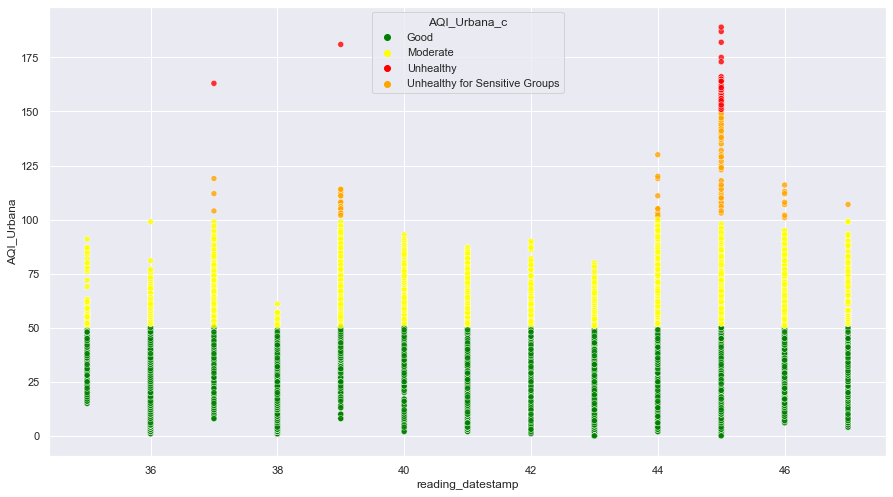

In [104]:
sns.scatterplot(data=AQI_combined, x=AQI_combined.index.week, y=AQI_combined['AQI_Urbana'],
                hue='AQI_Urbana_c', palette=colormap, alpha=0.8)


/var/folders/_m/f21vn7kj1b38wtjf1qn7m6kh0000gq/T/ipykernel_7047/2723643246.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sns.scatterplot(data=AQI_combined, x=AQI_combined.index.week, y=AQI_combined['combAQI'],


<AxesSubplot:xlabel='reading_datestamp', ylabel='combAQI'>

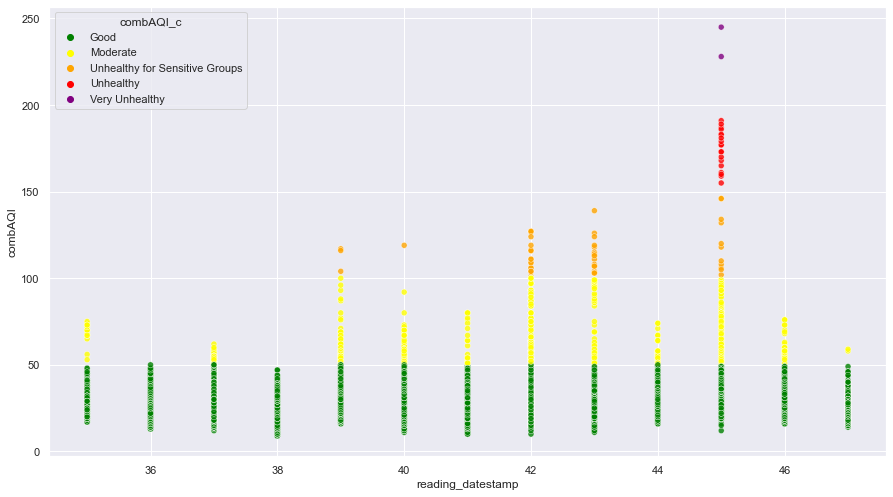

In [22]:
sns.scatterplot(data=AQI_combined, x=AQI_combined.index.week, y=AQI_combined['combAQI'],
                hue='combAQI_c', palette=colormap, alpha=0.8)

/var/folders/_m/f21vn7kj1b38wtjf1qn7m6kh0000gq/T/ipykernel_7047/2211319027.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sns.scatterplot(data=AQI_combined, x=AQI_combined.index.week, y=AQI_combined['AQI_UrbanaOH'],


<AxesSubplot:xlabel='reading_datestamp', ylabel='AQI_UrbanaOH'>

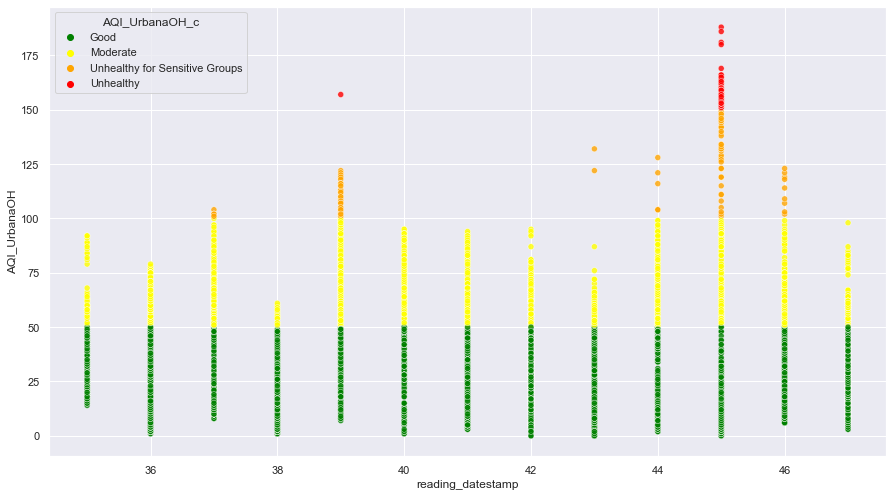

In [23]:

sns.scatterplot(data=AQI_combined, x=AQI_combined.index.week, y=AQI_combined['AQI_UrbanaOH'],
                hue='AQI_UrbanaOH_c', palette=colormap, alpha=0.8)

(18901.0, 18910.0)

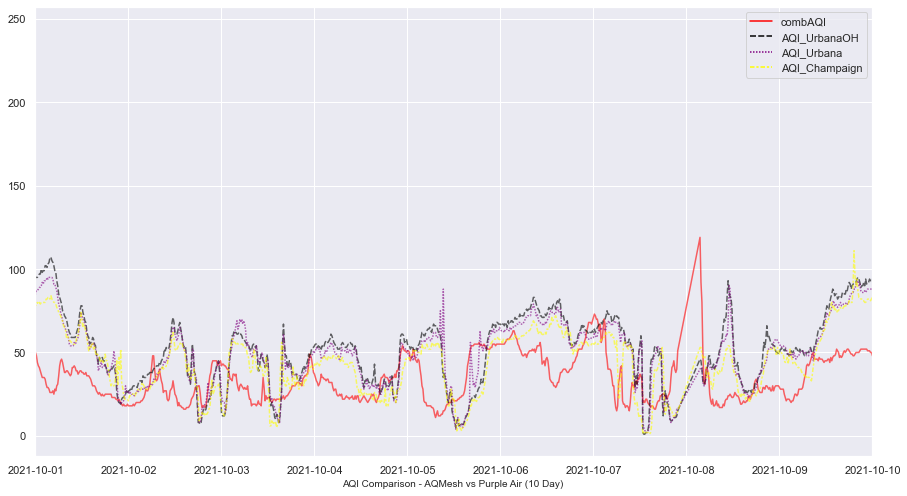

In [24]:
from datetime import datetime as dt
import seaborn as sns
sns.set_context("notebook", font_scale=1)
sns.set(rc={'figure.figsize':(15,8.27)})
left = dt(2021,10,1)
right = dt(2021,10,10)
ax = sns.lineplot(data=AQI_combined_all[['combAQI', 'AQI_UrbanaOH','AQI_Urbana','AQI_Champaign']], palette = ['red', 'black','purple', 'yellow'], alpha=0.6)
#ax = sns.lineplot(data=df_champaign[['pm2.5_Champaign']], palette = ['brown'], alpha=0.6)
ax.set_xlabel('AQI Comparison - AQMesh vs Purple Air (10 Day) ', fontsize=10)
ax.set_xlim(left, right)




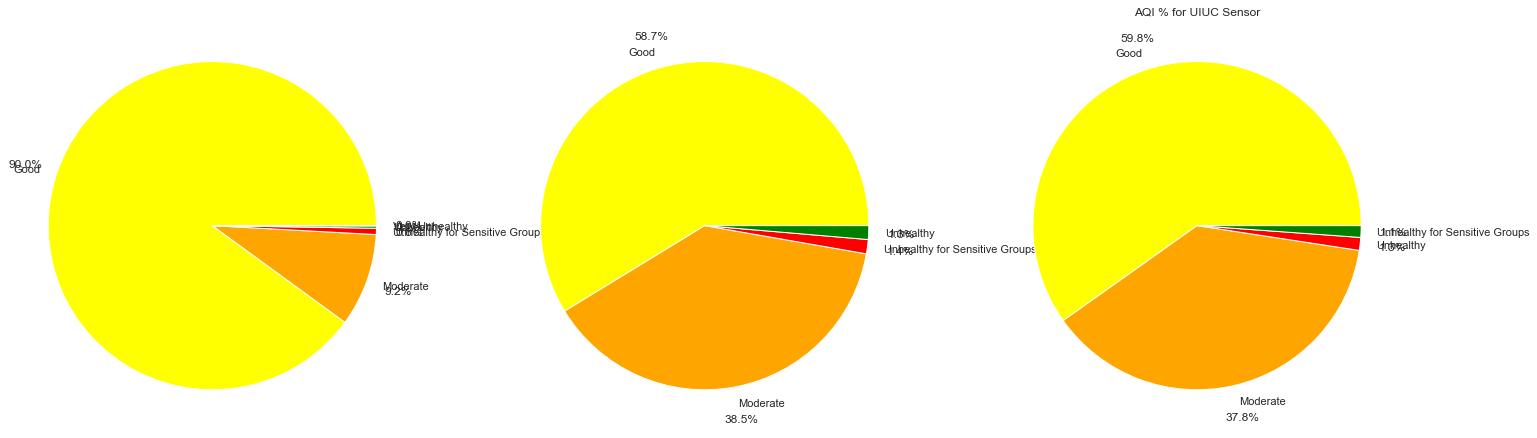

In [25]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(25,10))


axes[0].pie(AQI_combined.combAQI_c.value_counts(), 
        labels= AQI_combined.combAQI_c.unique(),
        colors=['yellow', 'orange', 'red', 'green', 'purple'], autopct='%1.1f%%', pctdistance=1.2);
axes[1].pie(AQI_combined.AQI_UrbanaOH_c.value_counts(), 
        labels= AQI_combined.AQI_UrbanaOH_c.unique(),
        colors=['yellow', 'orange', 'red', 'green', 'purple'], autopct='%1.1f%%', pctdistance=1.2);
axes[2].pie(AQI_combined.AQI_Urbana_c.value_counts(), 
        labels= AQI_combined.AQI_Urbana_c.unique(),
        colors=['yellow', 'orange', 'red', 'green', 'purple'], autopct='%1.1f%%', pctdistance=1.2);
plt.title('AQI % for UIUC Sensor');
plt.title('AQI % for UIUC Sensor');

In [26]:
#### Other stuff

In [27]:
#Lets get daily values to plot
df4= merged.groupby(np.arange(len(merged))//96).mean()
df4

,co_prescaled,CO2_prescaled,no_prescaled,no2_prescaled,o3_prescaled,pm1_prescale,pm2_5_prescale,pm4_prescale,pm10_prescale,pm_total_prescale,pm_tpc_prescale,nox_prescaled,temperature_f,pressure,humidity,pm2.5_UrbanaOH,pm2.5_Urbana
0,286.725521,411.269896,6.415729,6.958021,26.562708,4.896979,6.655000,7.913229,10.094167,10.095104,2.663750,12.758854,72.401042,991.905208,57.272917,8.499466,8.404418
1,299.467604,410.089375,6.174792,6.762292,26.329583,5.718021,7.458750,8.677292,10.563750,10.568229,3.070937,13.639167,71.135417,989.088542,66.889583,9.778185,9.513302
2,313.994687,423.826042,9.386979,5.363333,14.815104,6.971146,9.126354,10.872083,12.339271,12.344062,3.736875,14.745521,68.345833,985.207292,82.271875,14.008238,12.865941
3,282.066146,415.100833,3.879271,7.137708,27.327708,4.204687,5.743021,6.851354,9.103750,9.104687,2.322396,11.016979,73.851042,987.305208,59.314583,6.660988,6.321708
4,286.465521,414.439375,13.467708,9.407708,28.363021,6.741250,8.545625,9.521354,11.155521,11.156354,3.542708,22.875417,77.969792,986.236458,61.846875,13.987104,12.732135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,383.517188,771.364062,1.463333,8.781979,34.313125,1.975833,3.110417,3.963750,6.657292,6.666563,1.213542,10.245312,41.108333,990.441667,63.355208,8.261810,8.861295
83,355.170938,780.025312,1.817292,6.097604,26.516042,4.611875,6.112917,7.371250,10.714479,10.809896,2.517708,7.914896,44.282292,991.337500,72.889583,14.925168,15.823482
84,418.795625,774.775938,0.190937,12.233125,31.339167,0.949688,1.836771,2.637292,5.422500,5.441979,0.703333,12.424062,27.265625,997.381250,64.734375,3.580878,3.171920
85,411.439687,772.568229,0.740625,12.713021,25.014167,2.210313,3.432187,4.405417,6.641250,6.641563,1.326042,13.453646,34.688542,987.183333,69.865625,7.465703,7.374474


ValueError: x and y must have same first dimension, but have shapes (90,) and (87,)

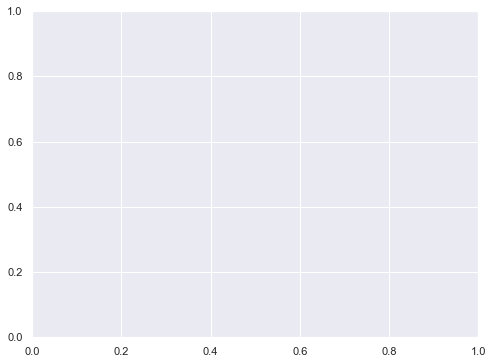

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
  
x = list(range(1, 91))
# ax.plot(x, df4['pm2_5_prescale'].tolist(), label="PM2.5")
ax.plot(x, df4['CO2_prescaled'].tolist(), label="CO2")
#ax.plot(x, df4['co_prescaled'].tolist(), label="CO")
# ax.plot(x, df4['no_prescaled'].tolist(), label="NO")
# ax.plot(x, df4['no2_prescaled'].tolist(), label="NO2")
# ax.plot(x, df4['o3_prescaled'].tolist(), label="Ozone")
# ax.plot(x, df4['temperature_f'].tolist(), label="Temp F")
#ax.plot(x, df4['pressure'].tolist(), label="Pressure")
ax.plot(x, df4['humidity'].tolist(), label="Humidity")
plt.xlabel("Days (1-90)")
#plt.ylabel("PM 2.5 Val in PPB")
plt.legend(title="Legend")

In [ ]:
df4= df3.groupby(np.arange(len(df3))//96).mean()
df4